In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [113]:
%matplotlib inline

## Data reading and prep

In [2]:
obsim_mm_means_df = pd.read_csv('../analysis_exp9_tandem05_nodischadj/mmdata/obsim_mm_means_df.csv', index_col=0)
obsim_mm_means_df

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,...,condmeantime_blockedbyldr_approx,condmeantime_blockedbyldr_sim,condmeantime_blockedbypp_approx,condmeantime_blockedbypp_sim,ldr_effmean_svctime_approx,ldr_effmean_svctime_sim,prob_blockedby_ldr_approx,prob_blockedby_ldr_sim,prob_blockedby_pp_approx,prob_blockedby_pp_sim
1,1,0.20,0.999950,0.950000,0.950000,2.739726,0.1,0.5,0.5,2,...,3.777411,3.302721,6.360755,6.401959,11.910124,11.915456,0.055045,0.051427,2.319907e-02,0.021741
2,2,0.20,0.999950,0.950000,0.850000,2.739726,0.1,0.5,0.5,2,...,4.025554,4.516602,8.685350,8.924706,12.465833,12.460024,0.063434,0.064167,1.037940e-01,0.096679
3,3,0.20,0.999950,0.950000,0.750000,2.739726,0.1,0.5,0.5,2,...,4.480172,6.928997,11.090321,11.186948,13.419348,13.264692,0.079524,0.086926,2.001325e-01,0.186347
4,4,0.20,0.999950,0.850000,0.950000,2.739726,0.1,0.5,0.5,2,...,5.222543,4.409709,6.360755,6.459064,11.252472,11.513514,0.165739,0.162672,2.319907e-02,0.021980
5,5,0.20,0.999950,0.850000,0.850000,2.739726,0.1,0.5,0.5,2,...,5.581905,5.217347,8.685350,8.377886,11.706673,11.877527,0.181751,0.176401,1.037940e-01,0.098517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,0.25,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.000000,1.351404,0.000000,11.999993,12.008200,0.000009,0.000000,1.235314e-08,0.000000
147,147,0.30,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.050268,1.328353,0.000000,11.999993,12.008225,0.000009,0.000009,1.933882e-09,0.000000
148,148,0.20,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.043137,1.184546,0.000000,11.999996,12.002392,0.000006,0.000003,1.769363e-08,0.000000
149,149,0.25,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.047906,1.158626,0.000000,11.999996,12.003488,0.000006,0.000004,2.147217e-09,0.000000


In [3]:
obsim_mm_means_df.columns.to_list()

['scenario',
 'tot_c_rate',
 'acc_tar_obs',
 'acc_tar_ldr',
 'acc_tar_pp',
 'daily_arr_rate',
 'alos_obs',
 'alos_ldr_1',
 'alos_ldr_2',
 'alos_pp_noc',
 'alos_pp_c',
 'load_obs',
 'load_ldr',
 'load_pp',
 'cap_obs',
 'cap_ldr',
 'cap_pp',
 'lam_obs',
 'lam_ldr',
 'lam_pp',
 'alos_ldr',
 'alos_pp',
 'rho_obs',
 'rho_ldr',
 'rho_pp',
 'cv2_obs',
 'cv2_ldr',
 'cv2_pp',
 'num_visits_obs_mean',
 'num_visits_ldr_mean',
 'num_visits_pp_mean',
 'num_visits_csect_mean',
 'planned_los_mean_mean_obs',
 'planned_los_mean_mean_ldr',
 'planned_los_mean_mean_pp',
 'planned_los_mean_mean_csect',
 'actual_los_mean_mean_obs',
 'actual_los_mean_mean_ldr',
 'actual_los_mean_mean_pp',
 'actual_los_mean_mean_csect',
 'planned_los_cv2_mean_obs',
 'planned_los_cv2_mean_ldr',
 'planned_los_cv2_mean_pp',
 'planned_los_cv2_mean_csect',
 'actual_los_cv2_mean_obs',
 'actual_los_cv2_mean_ldr',
 'actual_los_cv2_mean_pp',
 'actual_los_cv2_mean_csect',
 'planned_los_skew_mean_obs',
 'planned_los_skew_mean_ldr',
 'pla

In [4]:
[c for c in obsim_mm_means_df.columns.to_list() if '_pp' in c]

['acc_tar_pp',
 'alos_pp_noc',
 'alos_pp_c',
 'load_pp',
 'cap_pp',
 'lam_pp',
 'alos_pp',
 'rho_pp',
 'cv2_pp',
 'num_visits_pp_mean',
 'planned_los_mean_mean_pp',
 'actual_los_mean_mean_pp',
 'planned_los_cv2_mean_pp',
 'actual_los_cv2_mean_pp',
 'planned_los_skew_mean_pp',
 'actual_los_skew_mean_pp',
 'planned_los_kurt_mean_pp',
 'actual_los_kurt_mean_pp',
 'iatime_mean_mean_pp',
 'iatime_sd_mean_pp',
 'iatime_skew_mean_pp',
 'iatime_kurt_mean_pp',
 'mean_pct_blocked_by_pp',
 'mean_blocked_by_pp_mean',
 'mean_blocked_by_pp_p95',
 'occ_mean_mean_pp',
 'occ_mean_p75_pp',
 'occ_mean_p95_pp',
 'occ_mean_var_pp',
 'util_pp',
 'prob_blockedby_pp_approx',
 'prob_blockedby_pp_sim']

In [5]:
obsim_mm_means_df.iloc[-20:, :20]

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,alos_pp_c,load_obs,load_ldr,load_pp,cap_obs,cap_ldr,cap_pp,lam_obs,lam_ldr,lam_pp
131,131,0.30,0.999950,0.850000,0.850000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,16,81,24.657534,24.657534,24.657534
132,132,0.30,0.999950,0.850000,0.750000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,16,78,24.657534,24.657534,24.657534
133,133,0.30,0.999950,0.750000,0.950000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,15,86,24.657534,24.657534,24.657534
134,134,0.30,0.999950,0.750000,0.850000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,15,81,24.657534,24.657534,24.657534
135,135,0.30,0.999950,0.750000,0.750000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,15,78,24.657534,24.657534,24.657534
136,136,0.20,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.027397,5,9,22,2.739726,2.739726,2.739726
137,137,0.25,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.164384,5,9,22,2.739726,2.739726,2.739726
138,138,0.30,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.301370,5,9,23,2.739726,2.739726,2.739726
139,139,0.20,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.082192,7,16,45,8.219178,8.219178,8.219178
140,140,0.25,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.493151,7,16,46,8.219178,8.219178,8.219178


In [55]:
X_pp_noq = obsim_mm_means_df.loc[:, ['lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                      'tot_c_rate', 'cap_pp']]

X_ldr_noq = obsim_mm_means_df.loc[:, ['lam_ldr', 'alos_ldr', 'alos_ldr_1', 'alos_ldr_2', 
                                      'cap_ldr', 'lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                      'tot_c_rate', 'cap_pp']]

X_pp_q = obsim_mm_means_df.loc[:, ['lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                    'tot_c_rate', 'cap_pp', 'load_pp', 'rho_pp']]

X_pp_q['sqrt_load_pp'] = X_pp_q['load_pp'] ** 0.5

X_ldr_q = obsim_mm_means_df.loc[:, ['lam_ldr', 'alos_ldr', 'alos_ldr_1', 'alos_ldr_2', 
                                    'cap_ldr', 'load_ldr', 'rho_ldr', 'lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                    'tot_c_rate', 'cap_pp', 'load_pp', 'rho_pp']]

X_ldr_q['sqrt_load_ldr'] = X_ldr_q['load_ldr'] ** 0.5
X_ldr_q['sqrt_load_pp'] = X_ldr_q['load_pp'] ** 0.5

X_pp_load = obsim_mm_means_df.loc[:, ['load_pp']]
X_pp_load['sqrt_load_pp'] = X_pp_load['load_pp'] ** 0.5

y_pp_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_pp']
y_pp_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_pp']
y_mean_pct_blocked_by_pp = obsim_mm_means_df.loc[:, 'mean_pct_blocked_by_pp']

y_ldr_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_ldr']
y_ldr_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_ldr']

In [7]:
X_pp_load

,load_pp,sqrt_load_pp
1,6.027397,2.455076
2,6.027397,2.455076
3,6.027397,2.455076
4,6.027397,2.455076
5,6.027397,2.455076
...,...,...
146,43.150685,6.568918
147,44.109589,6.641505
148,54.246575,7.365227
149,55.479452,7.448453


In [8]:
y_pp_occ_mean

1       6.050726
2       6.017481
3       6.020065
4       6.021286
5       6.031431
         ...    
146    43.271001
147    44.317859
148    54.370029
149    55.673771
150    56.982402
Name: occ_mean_mean_pp, Length: 150, dtype: float64

In [9]:
X_pp_noq

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp
1,2.739726,2.20,2,3,0.20,12
2,2.739726,2.20,2,3,0.20,10
3,2.739726,2.20,2,3,0.20,9
4,2.739726,2.20,2,3,0.20,12
5,2.739726,2.20,2,3,0.20,10
...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85
147,19.178082,2.30,2,3,0.30,89
148,24.657534,2.20,2,3,0.20,100
149,24.657534,2.25,2,3,0.25,105


In [10]:
X_pp_q

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp
1,2.739726,2.20,2,3,0.20,12,6.027397,0.502283
2,2.739726,2.20,2,3,0.20,10,6.027397,0.602740
3,2.739726,2.20,2,3,0.20,9,6.027397,0.669711
4,2.739726,2.20,2,3,0.20,12,6.027397,0.502283
5,2.739726,2.20,2,3,0.20,10,6.027397,0.602740
...,...,...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85,43.150685,0.507655
147,19.178082,2.30,2,3,0.30,89,44.109589,0.495613
148,24.657534,2.20,2,3,0.20,100,54.246575,0.542466
149,24.657534,2.25,2,3,0.25,105,55.479452,0.528376


## Model building
Let's set up a pipeline to make it easy to build and evaluate models.

In [158]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics

## General function

**Note:** The `neg_` prefix in the scoring metric names indicates that it's the negative of MAE and MAPE. The reason for the negative sign is just so that during cross-validation, sklearn sorts results such that a higher score is better. Obviously, this isn't true for things like MAE, MSE, MAPE.

In [161]:
def fit_summarize_mm(scenario, X, y, flavor='lm',
                  scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
                  scale=False, fit_intercept=True, cv=5, return_train_score=True, return_estimator=True, 
                  lasso_alpha=1.0, lasso_max_iter=1000,
                  rf_random_state=0, rf_criterion='mae', rf_min_samples_split=10):

    # Create name label lists
    partitions = ['test', 'train']
    metric_names = [f"{p}_{s}" for s in scoring for p in partitions]
    var_names = X.columns.to_list()
    flavors_w_coeffs = ['lm', 'lasso', 'lassocv']

    # Create flavor specific pipelines
    if flavor == 'lm':
        if scale:
            model = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=fit_intercept))
        else:
            model = make_pipeline(LinearRegression(fit_intercept=fit_intercept))
    elif flavor == 'lasso':
        if scale:
            model = make_pipeline(StandardScaler(), Lasso(alpha=lasso_alpha, fit_intercept=fit_intercept, max_iter=lasso_max_iter))
        else:
            model = make_pipeline(Lasso(alpha=alpha, fit_intercept=fit_intercept, max_iter=max_iter))
    elif flavor == 'lassocv':
        if scale:
            model = make_pipeline(StandardScaler(), LassoCV(fit_intercept=fit_intercept, max_iter=lasso_max_iter))
        else:
            model = make_pipeline(LassoCV(fit_intercept=fit_intercept, max_iter=max_iter))
    elif flavor == 'rf':
        model = make_pipeline(RandomForestRegressor(criterion=rf_criterion, oob_score=True, min_samples_split=rf_min_samples_split, random_state=rf_random_state))
    elif flavor == 'svr':
        model = make_pipeline(SVR())
    elif flavor == 'nn':
        model = make_pipeline(MLPRegressor(max_iter=2000))
    else:
        raise ValueError(f"Unknown flavor: {flavor}")
    
    # Run the cross validation model fitting and testing
    scores = cross_validate(model, X, y, scoring=scoring,
                       cv=cv, return_train_score=return_train_score, return_estimator=return_estimator)

    
    # Extract coefficients for relevant flavors
    if flavor == 'lm':
        # The following cases are treated the same but leaving in the if logic in case I change my mind
        if scale:
            coeffs = [list(estimator.named_steps['linearregression'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['linearregression'].intercept_ for estimator in scores['estimator']]
        else:
            coeffs = [list(estimator.named_steps['linearregression'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['linearregression'].intercept_ for estimator in scores['estimator']]
    elif flavor == 'lasso':
        if scale:
            coeffs = [list(estimator.named_steps['lasso'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['lasso'].intercept_ for estimator in scores['estimator']]
        else:
            coeffs = [list(estimator.named_steps['lasso'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['lasso'].intercept_ for estimator in scores['estimator']]
    elif flavor == 'lassocv':
        if scale:
            coeffs = [list(estimator.named_steps['lassocv'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['lassocv'].intercept_ for estimator in scores['estimator']]
        else:
            coeffs = [list(estimator.named_steps['lassocv'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['lassocv'].intercept_ for estimator in scores['estimator']]
            
        alphas = [estimator.named_steps['lassocv'].alpha_ for estimator in scores['estimator']]
    
    # Extract metrics
    metrics = {metric:scores[metric] for metric in metric_names}
    metrics_df = pd.DataFrame(metrics)
    
    # Create predictions
    predictions = cross_val_predict(model, X, y)
    
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.scatter(y, predictions)
    ax.axline((0,0), slope=1)
    ax.set_xlabel('actual')  # Add an x-label to the axes.
    ax.set_ylabel('predicted')  # Add a y-label to the axes.
    ax.set_title("cross_val_predict")  # Add a title to the axes.
    
    # Create flavor specific results dictionaries (e.g. rf doesn't have coeffs)
    if flavor in flavors_w_coeffs:
        coeffs_df = pd.DataFrame(coeffs, columns=var_names)
        coeffs_df['intercept'] = intercept
        
        if scale:
            scaling_factors = np.array([list(estimator.named_steps['standardscaler'].scale_) for estimator in scores['estimator']])
            unscaled_coeffs = coeffs_df.iloc[:, :-1] / scaling_factors
        else:
            scaling_factors = np.ones((cv, len(var_names)))
            unscaled_coeffs = coeffs_df

        results = {'scenario': scenario,
                   'coeffs_df': unscaled_coeffs,
                   'metrics_df': metrics_df,
                   'scaling': scaling_factors,
                   'scaled_coeffs_df': coeffs_df,
                   'predictions': predictions,
                   'plot': fig}
        
        if flavor == 'lassocv':
            results['alphas'] = alphas
    else:
        results = {'scenario': scenario,
                   'metrics_df': metrics_df,
                   'predictions': predictions,
                   'plot': fig}
        
    return results


## Preliminary modeling test test fit_summarize_lm function
Let's build models for pp mean occupancy using q, noq, and load data. 

* linear regression with and without input scaling
* lasso

We want to make sure that our general analysis pipeline is working and that we can recover coefficients in unscaled form after using input scaling.

In [13]:
pp_occ_mean_q_lm_results = fit_summarize_mm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, scale=False, flavor='lm')
pp_occ_mean_q_lm_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,1.110223e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,-2.220446e-16,0.000000e+00,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,-4.440892e-16,-2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,5.551115e-16,0.000000e+00,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,3.330669e-16,1.665335e-16,0.179967,0.002932,0.987470,0.168063,-0.546017


In [14]:
pp_occ_mean_q_lm_results['scaled_coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,1.110223e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,-2.220446e-16,0.000000e+00,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,-4.440892e-16,-2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,5.551115e-16,0.000000e+00,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,3.330669e-16,1.665335e-16,0.179967,0.002932,0.987470,0.168063,-0.546017


In [15]:
pp_occ_mean_q_lm_results['scaling']

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

If we scale the data, then returned coefficients are in scaled units. **UPDATE** Removed all code related to scaling y. While it wasn't the right approach, I did learn how to use the `TransformedTargetRegressor` class which can wrap a `Pipeline` object and do some y transformation such as log(y). 

https://stackoverflow.com/questions/31029340/how-to-adjust-scaled-scikit-learn-logicistic-regression-coeffs-to-score-a-non-sc

In [16]:
pp_occ_mean_q_lm_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026649,-0.025528,-0.000689,-0.001153,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


### Analysis note
Obviously we can't really interpet some of the coefficients because they are related. We can't change the arrival rate or LOS without affecting load and rho.

Now let's do linear regression but with scaled X matrix.

In [17]:
pp_occ_mean_q_lm_scaled_results = fit_summarize_mm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, scale=True, flavor='lm')
pp_occ_mean_q_lm_scaled_results['scaled_coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.167350,5.461730e-03,-1.998401e-14,-2.664535e-15,5.461730e-03,0.038342,17.514044,0.012027,33.519055
1,0.068933,6.273376e-03,6.661338e-15,-1.332268e-15,6.273376e-03,0.044321,16.653445,0.013786,31.067899
2,0.187944,3.732223e+12,5.874166e+10,-1.624776e+11,-3.732223e+12,0.047852,17.520996,0.014893,28.458750
3,0.093619,2.990351e-03,-8.881784e-16,2.664535e-15,2.990351e-03,0.037585,17.661767,0.009750,33.278542
4,0.187787,7.024328e-03,2.398082e-14,1.376677e-14,7.024328e-03,0.065689,16.421929,0.011814,28.312544


As expected, the `load_pp` variable has dominating coefficient.

In [18]:
pp_occ_mean_q_lm_scaled_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026611,-0.025416,-0.000687,-0.001148,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


In [19]:
print(pp_occ_mean_q_lm_scaled_results['scaling'])

[[ 7.8644932   0.03608439  1.          1.          0.03608439 25.36778222
  17.6719377   0.10528763]
 [ 7.35145637  0.04161455  1.          1.          0.04161455 24.83270553
  16.72351095  0.10439095]
 [ 7.8644932   0.04564355  1.          1.          0.04564355 26.23318377
  17.70968525  0.10710282]
 [ 7.8644932   0.03608439  1.          1.          0.03608439 25.68364698
  17.7425171   0.10691623]
 [ 7.47297627  0.03903124  1.          1.          0.03903124 22.40368118
  16.63031435  0.07029715]]


Divide coeffs by scaling factors to get coeffs on original scale.

In [20]:
pp_occ_mean_q_lm_scaled_results['scaled_coeffs_df'].iloc[:, :-1] / pp_occ_mean_q_lm_scaled_results['scaling']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp
0,0.021279,1.513599e-01,-1.998401e-14,-2.664535e-15,1.513599e-01,0.001511,0.991065,0.114228
1,0.009377,1.507496e-01,6.661338e-15,-1.332268e-15,1.507496e-01,0.001785,0.995810,0.132058
2,0.023898,8.176891e+13,5.874166e+10,-1.624776e+11,-8.176891e+13,0.001824,0.989345,0.139049
3,0.011904,8.287103e-02,-8.881784e-16,2.664535e-15,8.287103e-02,0.001463,0.995449,0.091191
4,0.025129,1.799668e-01,2.398082e-14,1.376677e-14,1.799668e-01,0.002932,0.987470,0.168063


In [21]:
pp_occ_mean_q_lm_scaled_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp
0,0.021279,1.513599e-01,-1.998401e-14,-2.664535e-15,1.513599e-01,0.001511,0.991065,0.114228
1,0.009377,1.507496e-01,6.661338e-15,-1.332268e-15,1.507496e-01,0.001785,0.995810,0.132058
2,0.023898,8.176891e+13,5.874166e+10,-1.624776e+11,-8.176891e+13,0.001824,0.989345,0.139049
3,0.011904,8.287103e-02,-8.881784e-16,2.664535e-15,8.287103e-02,0.001463,0.995449,0.091191
4,0.025129,1.799668e-01,2.398082e-14,1.376677e-14,1.799668e-01,0.002932,0.987470,0.168063


In [22]:
pp_occ_mean_q_lm_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,1.110223e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,-2.220446e-16,0.000000e+00,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,-4.440892e-16,-2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,5.551115e-16,0.000000e+00,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,3.330669e-16,1.665335e-16,0.179967,0.002932,0.987470,0.168063,-0.546017


**YES!!** The scaled coeffs divided by the scaling are equal to the unscaled coeffs.

## Lasso models for mean occ in pp
Now do lasso. We need to scale because it's lasso.

In [23]:
pp_occ_mean_q_lasso_results = fit_summarize_mm('pp_occ_mean_q_lasso', X_pp_q, y_pp_occ_mean, 
                                               scale=True, flavor='lasso', alpha=1.0, max_iter=2000)
pp_occ_mean_q_lasso_results['coeffs_df']


,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp
0,0.071476,-0.0,0.0,0.0,-0.0,0.000000,0.914440,0.0
1,0.154393,0.0,0.0,0.0,0.0,0.000000,0.875333,0.0
2,0.044550,0.0,0.0,0.0,0.0,0.000000,0.926695,0.0
3,0.079265,0.0,0.0,0.0,0.0,0.000000,0.911602,0.0
4,0.340409,-0.0,0.0,0.0,-0.0,0.000841,0.788836,0.0


In [24]:
pp_occ_mean_q_lasso_results['scaled_coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.562121,-0.0,0.0,0.0,-0.0,0.000000,16.159919,0.0,33.519055
1,1.135012,0.0,0.0,0.0,0.0,0.000000,14.638642,0.0,31.067899
2,0.350361,0.0,0.0,0.0,0.0,0.000000,16.411484,0.0,28.454261
3,0.623376,0.0,0.0,0.0,0.0,0.000000,16.174108,0.0,33.278542
4,2.543865,-0.0,0.0,0.0,-0.0,0.018853,13.118587,0.0,28.312544


In [25]:
pp_occ_mean_q_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.849705,-0.874509,-0.096911,-0.060163,0.992687,0.996809
1,-1.093886,-0.835416,-0.089388,-0.058565,0.996739,0.996434
2,-0.806249,-0.877240,-0.018382,-0.066595,0.993516,0.996825
3,-0.754673,-0.879638,-0.084171,-0.060996,0.994263,0.996836
4,-1.288331,-0.863257,-0.046306,-0.065098,0.992850,0.996378


Interesting. We get slightly worse performance than the lm but have far fewer nonzero coefficients.


What if we build an unscaled model just with load.

In [26]:
pp_occ_mean_load_results = fit_summarize_mm('pp_occ_mean_load', X_pp_load, y_pp_occ_mean, 
                                               scale=False, flavor='lm')
pp_occ_mean_load_results['coeffs_df']


,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [27]:
pp_occ_mean_load_results['coeffs_df']

,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [28]:
pp_occ_mean_load_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.021624,-0.027922,-0.001878,-0.001011,0.999995,0.999995
1,-0.023331,-0.027035,-0.001043,-0.001157,0.999997,0.999995
2,-0.027871,-0.026081,-0.000725,-0.001241,0.999990,0.999996
3,-0.028433,-0.026230,-0.001925,-0.001013,0.999992,0.999996
4,-0.036885,-0.023580,-0.000909,-0.001191,0.999991,0.999996


Let's try lasso to see what it does with the sqrt term.

,load_pp,sqrt_load_pp
0,0.946226,0.0
1,0.943165,0.0
2,0.946463,0.0
3,0.946712,0.0
4,0.942858,0.0


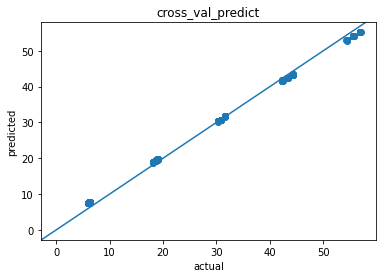

In [117]:
pp_occ_mean_load_lasso_results = fit_summarize_mm('pp_occ_mean_load_lasso', X_pp_load, y_pp_occ_mean, 
                                               scale=True, flavor='lasso')
pp_occ_mean_load_lasso_results['coeffs_df']


In [32]:
pp_occ_mean_load_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.837752,-0.876193,-0.096029,-0.060160,0.992810,0.996811
1,-1.147507,-0.828186,-0.090887,-0.058560,0.996443,0.996441
2,-0.806715,-0.877746,-0.018392,-0.066635,0.993509,0.996826
3,-0.768196,-0.879271,-0.085217,-0.061108,0.994156,0.996838
4,-1.164565,-0.859491,-0.043546,-0.064544,0.994241,0.996402


Doesn't perform as well but only uses load. Since PP is an M/G/c queue, mean occ is not equal to load.

## 95th percentile of PP occ

,load_pp,sqrt_load_pp,intercept
0,0.963347,2.100813,-0.888798
1,0.972320,2.018004,-0.762447
2,0.964071,2.119781,-1.053651
3,0.960324,2.183128,-1.312697
4,0.958938,2.182291,-1.223544


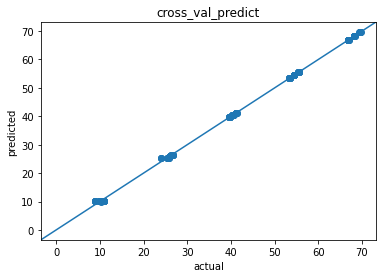

In [118]:
pp_occ_p95_load_results = fit_summarize_mm('pp_occ_p95_load', X_pp_load, y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_load_results['coeffs_df']


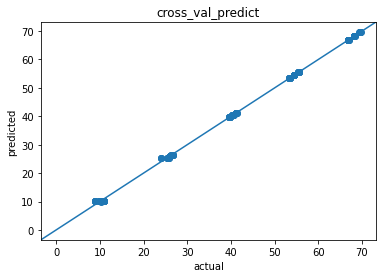

In [119]:
pp_occ_p95_load_results['plot']

,load_pp,sqrt_load_pp,intercept
0,0.998676,1.727269,0.0
1,1.002559,1.699847,0.0
2,1.009026,1.658282,0.0
3,1.012644,1.630446,0.0
4,1.011018,1.650403,0.0


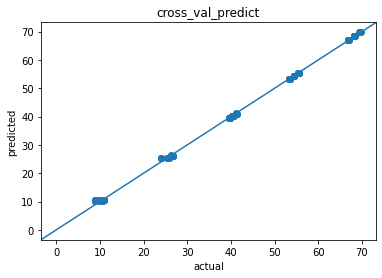

In [120]:
pp_occ_p95_load_results = fit_summarize_mm('pp_occ_p95_load', X_pp_load, y_pp_occ_p95, 
                                               scale=False, fit_intercept=False, flavor='lm')
pp_occ_p95_load_results['coeffs_df']


In [36]:
pp_occ_p95_load_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.396568,-0.172129,-0.026266,-0.011461,0.998143,0.999789
1,-0.310363,-0.205946,-0.025438,-0.011862,0.999568,0.999682
2,-0.109774,-0.280924,-0.002621,-0.018040,0.999898,0.999592
3,-0.308097,-0.249594,-0.018917,-0.014499,0.999424,0.999646
4,-0.147072,-0.279712,-0.004601,-0.017610,0.999914,0.999545


Let's try the noq predictors

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,2.603118,10.393705,1.776357e-15,0.0,10.393705,0.014108,-22.604563
1,2.646006,7.226697,0.000000e+00,0.0,7.226697,0.000490,-14.369781
2,2.606423,8.340251,0.000000e+00,0.0,8.340251,0.013050,-17.359515
3,2.598748,8.844866,-1.776357e-15,0.0,8.844866,0.009075,-18.272203
4,2.387259,6.909708,0.000000e+00,0.0,6.909708,0.084522,-13.895202


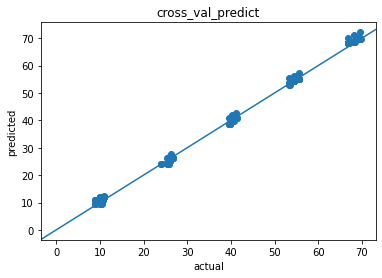

In [121]:
pp_occ_p95_noq_results = fit_summarize_mm('pp_occ_p95_load', X_pp_noq, y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_noq_results['coeffs_df']


In [38]:
pp_occ_p95_noq_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.827095,-0.535753,-0.037539,-0.024610,0.995558,0.999008
1,-0.878102,-0.490557,-0.043901,-0.022065,0.998025,0.999054
2,-0.480529,-0.584463,-0.010929,-0.029049,0.998478,0.998796
3,-0.648049,-0.518192,-0.044508,-0.023880,0.996857,0.998994
4,-1.014315,-0.592923,-0.029364,-0.027837,0.995175,0.998679


,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp,intercept
0,0.642016,2.839536,-1.076916e-14,0.000000e+00,2.839536,-0.038049,0.708750,-3.735036,2.457890,-6.682173
1,0.633713,2.406968,-7.771561e-16,1.110223e-15,2.406968,-0.037437,0.722210,-3.642568,2.341775,-5.347965
2,0.486163,2.003688,-1.110223e-15,4.440892e-16,2.003688,-0.049958,0.789274,-4.890658,2.540505,-4.044785
3,0.121632,0.352224,-1.332268e-15,8.881784e-16,0.352224,-0.049663,0.944361,-4.994886,2.627471,-0.146633
4,0.358386,1.537848,3.996803e-15,-4.440892e-16,1.537848,-0.143549,0.924418,-10.297199,3.128228,-0.604473


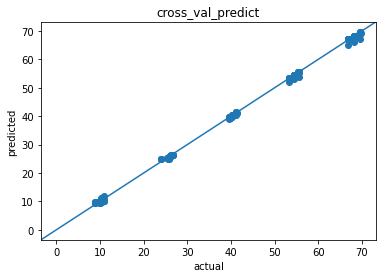

In [122]:
pp_occ_p95_q_results = fit_summarize_mm('pp_occ_p95_q', X_pp_q, y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_q_results['coeffs_df']


,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,0.527493,0.0,0.0,0.0,0.0,0.000000,0.710285,0.0,2.000126
1,0.709441,0.0,0.0,0.0,0.0,0.000000,0.659587,0.0,1.724772
2,0.392293,0.0,0.0,0.0,0.0,0.000000,0.779142,0.0,1.946787
3,0.656003,0.0,0.0,0.0,0.0,0.002190,0.667975,0.0,1.882124
4,0.896925,0.0,0.0,0.0,0.0,0.064907,0.450217,0.0,2.072992


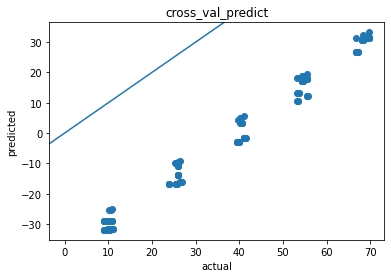

In [124]:
pp_occ_p95_q_lasso_results = fit_summarize_mm('pp_occ_p95_q', X_pp_q, y_pp_occ_p95, 
                                               scale=True, fit_intercept=False, lasso_alpha=.5, flavor='lasso')
pp_occ_p95_q_lasso_results['coeffs_df']


In [40]:
pp_occ_p95_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.745437,-0.441545,-0.044173,-0.020799,0.996449,0.999206
1,-0.673666,-0.453129,-0.042154,-0.021118,0.998545,0.999146
2,-0.452560,-0.548887,-0.010277,-0.027235,0.998658,0.998967
3,-0.591827,-0.505413,-0.031964,-0.023322,0.997967,0.999065
4,-1.067798,-0.511207,-0.019904,-0.025949,0.994726,0.998926


## 95th percentile occ for LDR

,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,load_ldr,rho_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_ldr,sqrt_load_pp,intercept
0,1.219695e+06,-0.053735,-0.117413,-0.029779,0.168870,-4.878782e+06,-6.578421,1.219696e+06,1.933843,-4.409230e-09,0.000000e+00,1.951755,-0.077848,0.042966,2.818841,-1.557183,1.878833,-4.402845
1,-8.726121e+06,0.265962,0.097421,-0.137881,0.155561,3.490448e+07,-6.651566,-8.726120e+06,0.775029,-1.629815e-08,0.000000e+00,0.599150,-0.079590,0.088398,2.687435,0.878917,0.649474,-1.324833
2,-2.236483e+06,0.033511,0.029094,0.024011,0.199326,8.945934e+06,-5.778716,-2.236484e+06,0.674519,1.829176e-08,0.000000e+00,0.663420,-0.095900,0.377637,1.741356,5.255145,-1.362111,-0.980516
3,1.793859e+06,0.118140,0.071052,-0.058722,0.169927,-7.175437e+06,-6.561815,1.793859e+06,-1.746041,1.173612e-08,0.000000e+00,-1.748883,-0.080635,0.374067,2.570031,1.276140,0.580975,4.689579
4,8.915096e+04,0.001752,0.000048,-0.000730,1.010879,-3.566038e+05,0.227998,8.915094e+04,0.081490,-1.216904e-09,5.820766e-11,0.082053,0.007609,-0.015575,0.610486,-0.007477,-0.057864,-0.612122


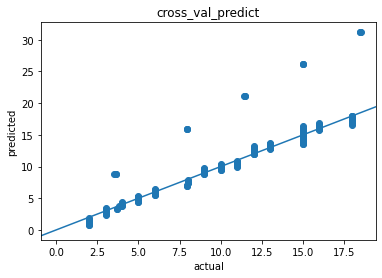

In [125]:
ldr_occ_p95_q_results = fit_summarize_mm('ldr_occ_p95_load', X_ldr_q, y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_q_results['coeffs_df']


In [97]:
ldr_occ_p95_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.469672,-0.445524,-0.093686,-0.057545,0.976586,0.987671
1,-0.513900,-0.433069,-0.073690,-0.059044,0.987194,0.987577
2,-0.517324,-0.416485,-0.042005,-0.060750,0.970329,0.989242
3,-0.463371,-0.445601,-0.093382,-0.057856,0.976930,0.987591
4,-4.674314,-0.016357,-0.473861,-0.004264,-1.482328,0.999948


Notice how in fold 4, train got overfit leading to terrible performance on test.

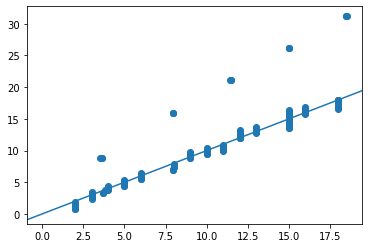

In [98]:
plt.scatter(y_ldr_occ_p95, ldr_occ_p95_q_results['predictions'])
plt.axline((0,0), slope=1)

,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,load_ldr,rho_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_ldr,sqrt_load_pp
0,0.282784,0.0,0.0,0.0,0.117051,0.000000,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.054475,0.0,0.007933,0.033466
1,0.418827,0.0,0.0,0.0,0.112290,0.000000,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.012136,0.000000
2,0.382803,0.0,0.0,0.0,0.115533,0.000591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.334294,0.000000
3,0.399167,0.0,0.0,0.0,0.116581,0.000271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.136897,0.000000
4,0.000000,0.0,0.0,0.0,0.792145,0.000000,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.000000,0.0,0.000000,0.000000


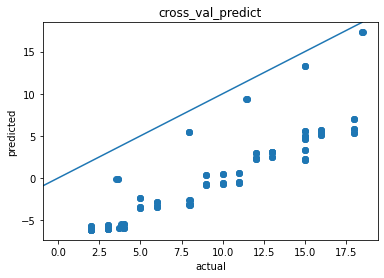

In [126]:
ldr_occ_p95_q_lasso_results = fit_summarize_mm('ldr_occ_p95_q', X_ldr_q, y_ldr_occ_p95, 
                                               scale=True, fit_intercept=False, lasso_alpha=1.0, flavor='lasso')
ldr_occ_p95_q_lasso_results['coeffs_df']


In [104]:
ldr_occ_p95_q_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-10.109150,-10.606255,-1.836301,-1.356905,-5.995586,-3.631056
1,-9.858691,-10.005206,-1.549816,-1.331274,-2.225374,-3.449129
2,-9.877709,-9.328426,-0.860757,-1.405654,-6.502498,-2.494748
3,-10.068900,-10.606865,-1.831349,-1.356890,-5.941758,-3.632216
4,-6.294824,-9.166297,-0.526301,-1.394672,-1.988011,-2.717808


Let's use LassoCV to see what optimal alphas look like.

,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,load_ldr,rho_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_ldr,sqrt_load_pp
0,0.473251,0.0,0.0,0.0,0.019779,0.0,-0.000000,0.0,-0.000000,0.0,0.0,-0.000000e+00,0.0,0.0,0.000000,0.0,0.0
1,0.473391,0.0,0.0,0.0,0.019930,0.0,-0.000000,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0
2,0.473869,0.0,0.0,0.0,0.020276,0.0,-0.000000,0.0,-0.000000,0.0,0.0,-0.000000e+00,0.0,0.0,0.000000,0.0,0.0
3,0.472522,0.0,0.0,0.0,0.018950,0.0,-0.000000,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0
4,0.442099,0.0,0.0,0.0,0.088022,0.0,-0.429007,0.0,-0.095131,0.0,0.0,-2.370373e-16,0.0,0.0,0.341889,0.0,0.0


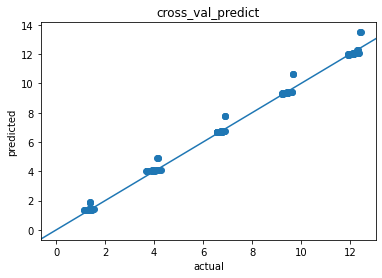

In [149]:
ldr_occ_mean_q_lassocv_results = fit_summarize_mm('ldr_occ_mean_q', X_ldr_q, y_ldr_occ_mean, 
                                                 scale=True, fit_intercept=True, 
                                                 flavor='lassocv', lasso_max_iter=2000)
ldr_occ_mean_q_lassocv_results['coeffs_df']


In [150]:
ldr_occ_mean_q_lassocv_results['alphas']

[0.07294286227642188,
 0.07337992980525103,
 0.059192956873852794,
 0.07812061882312044,
 0.003698239915302186]

,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,load_ldr,rho_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_ldr,sqrt_load_pp
0,0.248030,0.0,0.0,0.0,0.149054,0.000000,-0.000000,0.0,-0.0,0.0,0.0,-0.0,0.000000,0.074243,0.000000,0.007905,0.107004
1,0.421784,0.0,0.0,0.0,0.150420,0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.293486,0.000000
2,0.393027,0.0,0.0,0.0,0.157743,0.001020,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.573346,0.000000
3,0.408685,0.0,0.0,0.0,0.148405,0.000591,-0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.293423,0.000000
4,0.000000,0.0,0.0,0.0,0.996964,0.000000,0.072826,0.0,0.0,0.0,0.0,0.0,0.000152,0.000000,0.223827,0.000000,0.000000


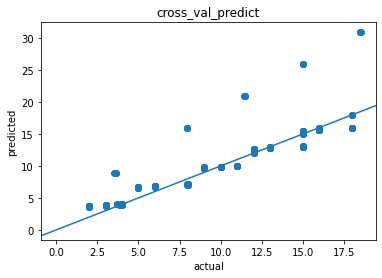

In [147]:
ldr_occ_p95_q_lassocv_results = fit_summarize_mm('ldr_occ_p95_q_lassocv', X_ldr_q, y_ldr_occ_p95, 
                                                 scale=True, fit_intercept=True, 
                                                 flavor='lassocv', lasso_max_iter=2000)
ldr_occ_p95_q_lassocv_results['coeffs_df']


In [148]:
ldr_occ_p95_q_lassocv_results['alphas']

[0.6385346637179357,
 0.5726095604581887,
 0.4912396830844886,
 0.6384817660108684,
 0.004781974355164046]

## Trying SVR 

Just going to use default C and epsilon for now.

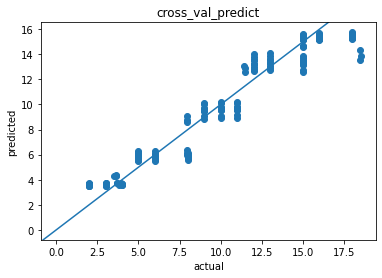

In [157]:
ldr_occ_p95_q_svr_results = fit_summarize_mm('ldr_occ_p95_q_svr', X_ldr_q, y_ldr_occ_p95, flavor='svr')



In [164]:
ldr_occ_p95_q_svr_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-1.074565,-0.936818,-0.198296,-0.128964,0.881210,0.942038
1,-0.929918,-0.950703,-0.161445,-0.129775,0.951476,0.938275
2,-0.958310,-0.916939,-0.082355,-0.137004,0.897814,0.945298
3,-0.918900,-0.958338,-0.190231,-0.130048,0.919554,0.939090
4,-1.420316,-0.915770,-0.113021,-0.139435,0.807851,0.942381


## Trying MLPRegressor (neural net) 

Just going to use default values for all tuning parameters for now (except hard coded max_iter=2000)

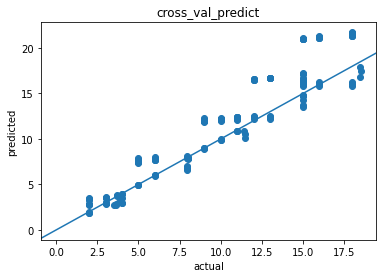

In [162]:
ldr_occ_p95_q_nn_results = fit_summarize_mm('ldr_occ_p95_q_nn', X_ldr_q, y_ldr_occ_p95, flavor='nn')



In [163]:
ldr_occ_p95_q_nn_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-1.506041,-3.249892,-0.228881,-0.297613,0.779567,0.393338
1,-0.070823,-0.098220,-0.011426,-0.013120,0.999628,0.999045
2,-2.286001,-2.301507,-0.207130,-0.259796,0.476832,0.584332
3,-0.063596,-0.058707,-0.009727,-0.006427,0.999297,0.999624
4,-3.153153,-1.803104,-0.243245,-0.251422,0.374386,0.787715


Text(0.5, 1.0, 'cross_val_predict')

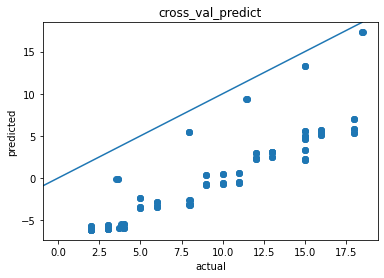

In [112]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.scatter(y_ldr_occ_p95, ldr_occ_p95_q_lasso_results['predictions'])
ax.axline((0,0), slope=1)
ax.set_xlabel('actual')  # Add an x-label to the axes.
ax.set_ylabel('predicted')  # Add a y-label to the axes.
ax.set_title("cross_val_predict")  # Add a title to the axes.

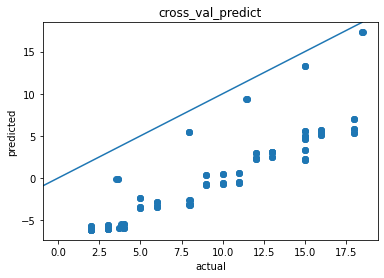

In [115]:
fig

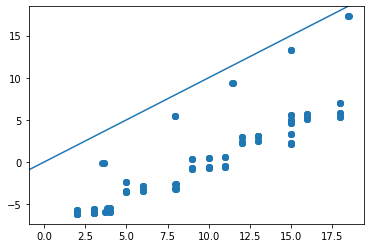

In [106]:
plt.scatter(y_ldr_occ_p95, ldr_occ_p95_q_lasso_results['predictions'])
plt.axline((0,0), slope=1)

,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,0.394117,3.706757e-14,2.105000e-14,-1.665335e-16,0.484043,0.394117,5.181863,0.0,0.0,5.181863,-0.152407,-12.100637
1,0.415383,-4.607426e-15,2.867498e-15,1.110223e-16,0.495059,0.415383,2.772506,0.0,0.0,2.772506,-0.167245,-5.919437
2,0.397251,4.704570e-15,6.005613e-15,4.440892e-16,0.482999,0.397251,3.519558,0.0,0.0,3.519558,-0.156876,-7.700688
3,0.390517,4.579670e-15,1.644518e-15,-3.330669e-16,0.477501,0.390517,3.440604,0.0,0.0,3.440604,-0.153325,-7.417426
4,0.005293,0.000000e+00,1.665335e-16,0.000000e+00,0.992451,0.005293,0.035016,0.0,0.0,0.035016,-0.001514,-0.098417


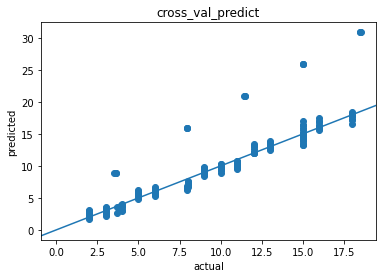

In [127]:
ldr_occ_p95_noq_results = fit_summarize_mm('ldr_occ_p95_load', X_ldr_noq, y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_noq_results['coeffs_df']


In [64]:
ldr_occ_p95_noq_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.686426,-0.552185,-0.111148,-0.068785,0.953088,0.981077
1,-0.649662,-0.543514,-0.089939,-0.070006,0.978858,0.980029
2,-0.616172,-0.546778,-0.054163,-0.081389,0.957945,0.982003
3,-0.589596,-0.558312,-0.112663,-0.069763,0.964735,0.980993
4,-4.596289,-0.017608,-0.469397,-0.003692,-1.387198,0.999928


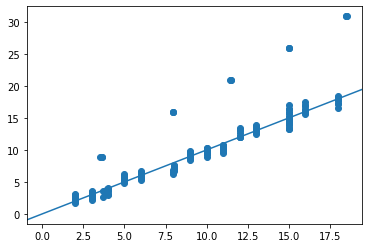

In [100]:
plt.scatter(y_ldr_occ_p95, ldr_occ_p95_noq_results['predictions'])
plt.axline((0,0), slope=1)

## Pct blocked in LDR

,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,load_ldr,rho_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_ldr,sqrt_load_pp,intercept
0,-248604.427499,0.010953,0.023932,0.006070,-0.001615,9.944182e+05,-0.062446,-248604.551744,-0.489597,8.440111e-10,0.000000e+00,-0.493248,0.005235,-0.049346,0.662416,-2.746275,1.185522,1.169293
1,-161293.119670,0.004916,0.001801,-0.002549,-0.000216,6.451724e+05,-0.047193,-161293.103464,-0.054941,-2.837623e-10,0.000000e+00,-0.058192,0.004512,0.016045,0.627279,0.284714,-0.225359,0.066658
2,-207860.909377,0.003115,0.002704,0.002232,-0.000160,8.314438e+05,-0.047662,-207860.986109,-0.100694,1.659828e-09,0.000000e+00,-0.101726,0.005276,-0.004682,0.713779,-0.365671,0.066303,0.160298
3,-244106.063593,-0.016076,-0.009669,0.007991,-0.000906,9.764242e+05,-0.061366,-244106.150199,0.365826,-1.547960e-09,0.000000e+00,0.366213,0.005467,0.040355,0.727205,2.247058,-1.174707,-0.962996
4,-253900.998014,-0.004988,-0.000137,0.002078,-0.000424,1.015604e+06,-0.005357,-253900.932496,-0.032400,3.477908e-09,-1.164153e-10,-0.034005,0.010314,-0.009865,1.123406,-0.234898,-0.040096,-0.192874


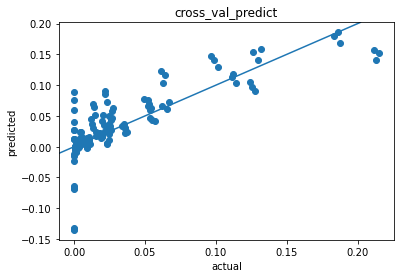

In [128]:
mean_pct_blocked_by_pp_q_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q, y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_q_results['coeffs_df']


In [66]:
mean_pct_blocked_by_pp_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.020690,-0.009220,-8.605891e-01,-9.838947e+12,0.756734,0.875169
1,-0.017242,-0.010440,-1.231485e+00,-9.822142e+12,0.848708,0.869051
2,-0.003486,-0.013331,-1.158366e+00,-1.374645e+13,0.908808,0.870801
3,-0.018612,-0.011547,-1.529942e+00,-1.192974e+13,0.530448,0.883460
4,-0.034558,-0.007016,-1.457130e+14,-1.208318e+00,-435.040252,0.967012


,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,0.002695,9.020562e-17,5.122855e-17,8.673617e-19,0.004350,0.002695,0.012534,0.0,0.0,0.012534,-0.003572,0.042565
1,0.002561,7.242471e-17,-4.365269e-17,0.000000e+00,0.003741,0.002561,-0.040587,0.0,0.0,-0.040587,-0.003314,0.174205
2,0.003210,-3.903128e-18,-9.486769e-18,-8.673617e-19,0.005371,0.003210,-0.004621,0.0,0.0,-0.004621,-0.004299,0.097747
3,0.003045,9.020562e-17,3.220080e-17,-6.938894e-18,0.004965,0.003045,0.065211,0.0,0.0,0.065211,-0.004195,-0.069354
4,0.009435,0.000000e+00,0.000000e+00,4.336809e-19,0.000052,0.009435,-0.008908,0.0,0.0,-0.008908,-0.007687,0.134873


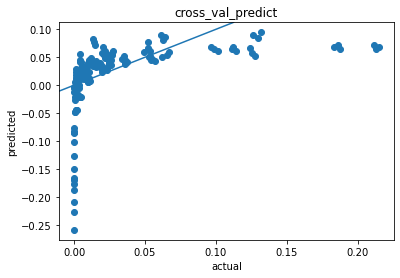

In [129]:
mean_pct_blocked_by_pp_noq_results = fit_summarize_mm('mean_pct_blocked_by_pp_noq', X_ldr_noq, y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_noq_results['coeffs_df']


In [68]:
mean_pct_blocked_by_pp_noq_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.034877,-0.020160,-1.414492e+00,-1.415629e+13,0.281082,0.418618
1,-0.031403,-0.021345,-1.605613e+00,-1.415089e+13,0.347050,0.449677
2,-0.013830,-0.027816,-5.581282e+00,-1.698264e+13,-0.252531,0.437929
3,-0.031969,-0.024924,-4.372187e+00,-1.763748e+13,0.132418,0.461000
4,-0.085820,-0.024326,-2.940179e+14,-5.120134e+00,-1876.755104,0.550523


,lam_ldr,alos_ldr,alos_ldr_1,alos_ldr_2,cap_ldr,load_ldr,rho_ldr,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_ldr,sqrt_load_pp
0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.000605,-0.0,0.000000,-0.0,-0.000000
1,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.000634,-0.0,0.006175,-0.0,-0.000000
2,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.000000,-0.0,0.113304,-0.0,-0.014283
3,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.000311,-0.0,0.070289,-0.0,-0.009308
4,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.000000,-0.0,0.146465,-0.0,-0.016841


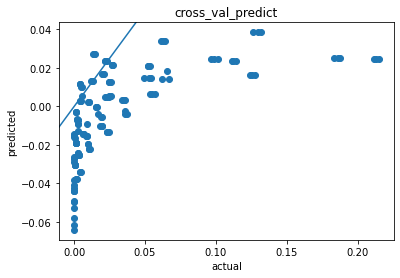

In [131]:
mean_pct_blocked_by_pp_q_lasso_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q, y_mean_pct_blocked_by_pp, 
                                               scale=True, fit_intercept=False, lasso_alpha=0.01, flavor='lasso')
mean_pct_blocked_by_pp_q_lasso_results['coeffs_df']


In [73]:
mean_pct_blocked_by_pp_q_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.047611,-0.025949,-7.404932e-01,-9.455942e+12,-0.519176,-0.014568
1,-0.046100,-0.027989,-2.655590e+00,-1.019832e+13,-0.233666,-0.079665
2,-0.023988,-0.035907,-9.098890e+00,-1.509788e+13,-2.259361,0.003526
3,-0.022233,-0.032352,-2.102744e+00,-1.254914e+13,0.233254,0.076651
4,-0.037472,-0.038512,-8.768707e+13,-5.452495e+00,-228.136674,-0.071547


Well, pct blocked by PP is much harder to predict. Lasso fails miserably. Coefficients in linear models are all over the place.

How do things like random forest do?

In [79]:
rf_model = make_pipeline(RandomForestRegressor(criterion='mae', oob_score=True, min_samples_split=10, random_state=0))

In [90]:
scores_pct_blocked_by_pp_q_rf = cross_validate(rf_model, X_ldr_q, y_mean_pct_blocked_by_pp, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'],
                       cv=5, return_train_score=True, return_estimator=True)
scores_pct_blocked_by_pp_q_rf


{'fit_time': array([0.24450088, 0.20092654, 0.17526174, 0.17602658, 0.18094349]),
 'score_time': array([0.0074718 , 0.00751185, 0.00717616, 0.00721478, 0.00730753]),
 'estimator': [Pipeline(steps=[('randomforestregressor',
                   RandomForestRegressor(criterion='mae', min_samples_split=10,
                                         oob_score=True, random_state=0))]),
  Pipeline(steps=[('randomforestregressor',
                   RandomForestRegressor(criterion='mae', min_samples_split=10,
                                         oob_score=True, random_state=0))]),
  Pipeline(steps=[('randomforestregressor',
                   RandomForestRegressor(criterion='mae', min_samples_split=10,
                                         oob_score=True, random_state=0))]),
  Pipeline(steps=[('randomforestregressor',
                   RandomForestRegressor(criterion='mae', min_samples_split=10,
                                         oob_score=True, random_state=0))]),
  Pipeline(steps=

In [91]:
pred_pct_blocked_by_pp_q_rf = cross_val_predict(rf_model, X_ldr_q, y_mean_pct_blocked_by_pp)
pred_pct_blocked_by_pp_q_rf


array([0.02506025, 0.13263902, 0.13464581, 0.02506025, 0.13263902,
       0.13464581, 0.02506025, 0.13263902, 0.13464581, 0.01480462,
       0.04858062, 0.05248592, 0.01561527, 0.04921722, 0.05264387,
       0.01648939, 0.04974231, 0.05264387, 0.00608561, 0.02306615,
       0.03013297, 0.00615433, 0.02306615, 0.03013297, 0.00615433,
       0.02358662, 0.03049875, 0.0022981 , 0.01819971, 0.0267312 ,
       0.00224122, 0.01593918, 0.0318524 , 0.00237644, 0.01590414,
       0.03181737, 0.00265081, 0.01269163, 0.02743401, 0.00265863,
       0.01269163, 0.02743401, 0.00271509, 0.01265659, 0.02739898,
       0.01762298, 0.12286704, 0.13357267, 0.01762298, 0.12286704,
       0.13357267, 0.01812108, 0.12286704, 0.13357267, 0.00719067,
       0.027851  , 0.0515935 , 0.00736963, 0.02825337, 0.05199231,
       0.00858464, 0.02284683, 0.05354775, 0.00375467, 0.02009876,
       0.02546687, 0.00393415, 0.02009876, 0.025353  , 0.00410666,
       0.02018846, 0.0254427 , 0.00105366, 0.00513732, 0.01693

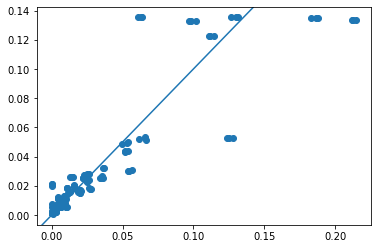

In [94]:
plt.scatter(y_mean_pct_blocked_by_pp, pred_pct_blocked_by_pp_q)
plt.axline((0,0), slope=1)

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.019901,-0.004612,-2.694400e-01,-1.162103e+12,0.691263,0.896073
1,-0.012497,-0.004924,-3.087312e-01,-9.300183e+11,0.832157,0.927832
2,-0.003644,-0.004883,-5.263219e-01,-8.950040e+11,0.881818,0.966119
3,-0.012124,-0.006682,-6.261478e-01,-1.563714e+12,0.605183,0.918585
4,-0.003749,-0.004754,-1.360682e+13,-1.945891e-01,-6.160090,0.962673


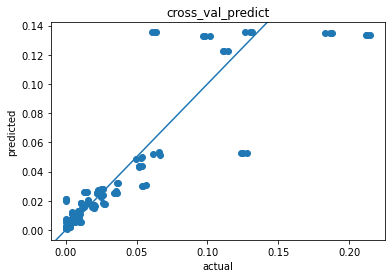

In [132]:
mean_pct_blocked_by_pp_q_rf_results = fit_summarize_mm('mean_pct_blocked_by_pp_q_rf', X_ldr_q, y_mean_pct_blocked_by_pp, 
                                               scale=False, flavor='rf')

mean_pct_blocked_by_pp_q_rf_results['metrics_df']

How does rf do with the occ measures?

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.556135,-0.062270,-0.030986,-0.002803,0.995339,0.999947
1,-0.440138,-0.073618,-0.011195,-0.002662,0.999029,0.999896
2,-0.405526,-0.057785,-0.009123,-0.002537,0.998584,0.999965
3,-0.241209,-0.046768,-0.015695,-0.001896,0.999525,0.999983
4,-1.600224,-0.046570,-0.078114,-0.001705,0.986686,0.999959


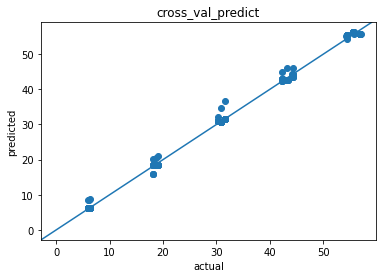

In [135]:
pp_occ_mean_q_rf_results = fit_summarize_mm('pp_occ_mean_q_rf', X_pp_q, y_pp_occ_mean, scale=False, flavor='rf')
pp_occ_mean_q_rf_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.806633,-0.067181,-0.044751,-0.002992,0.983151,0.999933
1,-0.463567,-0.086048,-0.013008,-0.003111,0.998974,0.999869
2,-0.532144,-0.081008,-0.013382,-0.003919,0.997644,0.999936
3,-0.389579,-0.056511,-0.020342,-0.002356,0.998630,0.999969
4,-3.397096,-0.066816,-0.194743,-0.002259,0.926867,0.999932


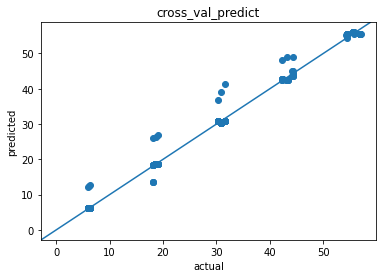

In [136]:
pp_occ_mean_noq_rf_results = fit_summarize_mm('pp_occ_mean_noq_rf', X_pp_noq, y_pp_occ_mean, scale=False, flavor='rf')
pp_occ_mean_noq_rf_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.917403,-0.131835,-0.043186,-0.006438,0.987280,0.999874
1,-0.595510,-0.164218,-0.020759,-0.007686,0.999048,0.999826
2,-0.492806,-0.142831,-0.010459,-0.006512,0.997987,0.999904
3,-0.580120,-0.123231,-0.026332,-0.005290,0.998163,0.999933
4,-3.878026,-0.133668,-0.145029,-0.005670,0.925049,0.999897


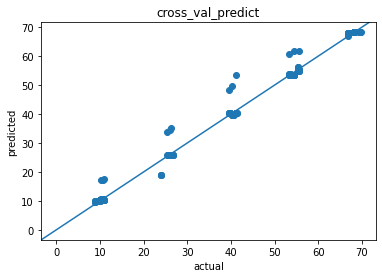

In [137]:
pp_occ_p95_noq_rf_results = fit_summarize_mm('pp_occ_p95_noq_rf', X_pp_noq, y_pp_occ_p95, scale=False, flavor='rf')
pp_occ_p95_noq_rf_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.583689,-0.139200,-0.033131,-0.006989,0.996830,0.999860
1,-0.615466,-0.182988,-0.021202,-0.008760,0.998951,0.999793
2,-0.330701,-0.141499,-0.006602,-0.006575,0.999301,0.999912
3,-0.411595,-0.111286,-0.022391,-0.004830,0.998962,0.999945
4,-2.046312,-0.122102,-0.074905,-0.005681,0.982872,0.999914


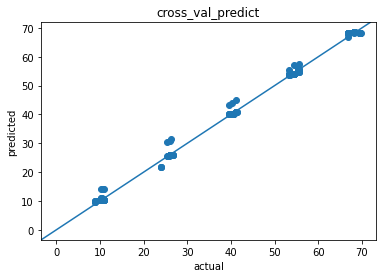

In [138]:
pp_occ_p95_q_rf_results = fit_summarize_mm('pp_occ_p95_q_rf', X_pp_q, y_pp_occ_p95, scale=False, flavor='rf')
pp_occ_p95_q_rf_results['metrics_df']

Clearly, the addition of queueing terms helped the random forest.

## Dev work that lead to function above

The `neg_` prefix indicates that it's the negative of MAE and MAPE. The reason for the negative sign is just so that during cross-validation, sklearn sorts results such that a higher score is better. Obviously, this isn't true for things like MAE, MSE, MAPE.

In [140]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']
partitions = ['test', 'train']
metric_names = [f"{p}_{s}" for s in scoring for p in partitions]
metric_names

['test_neg_mean_absolute_error',
 'train_neg_mean_absolute_error',
 'test_neg_mean_absolute_percentage_error',
 'train_neg_mean_absolute_percentage_error',
 'test_r2',
 'train_r2']

### Build models for mean pp occupancy

In [163]:
pp_lm_occ_mean_noq = LinearRegression()
scores_pp_occ_mean_noq = cross_validate(pp_lm_occ_mean_noq, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)
scores_pp_occ_mean_noq


{'fit_time': array([0.00499058, 0.00408959, 0.0035429 , 0.00414085, 0.00309372]),
 'score_time': array([0.00387621, 0.00341439, 0.00342035, 0.00301623, 0.00273848]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_neg_mean_absolute_error': array([-0.59194164, -0.37523537, -0.03532902, -0.56571977, -0.64962964]),
 'train_neg_mean_absolute_error': array([-0.20896505, -0.23621587, -0.28186962, -0.21590945, -0.19726156]),
 'test_neg_mean_absolute_percentage_error': array([-0.06280967, -0.01017265, -0.00086978, -0.05860219, -0.02197447]),
 'train_neg_mean_absolute_percentage_error': array([-0.01499067, -0.01640718, -0.02004993, -0.01549491, -0.01348929]),
 'test_r2': array([0.99680496, 0.99934405, 0.99998523, 0.99725337, 0.99823083]),
 'train_r2': array([0.99978356, 0.99970275, 0.99961326, 0.9997724 , 0.99978166])}

## Testing LassoCV

In [151]:
pp_lm_occ_mean_q_lassocv = make_pipeline(LassoCV(normalize=True, fit_intercept=True))

scores_pp_lm_occ_mean_q_lassocv = cross_validate(pp_lm_occ_mean_q_lassocv, X_pp_q, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)

scores_pp_lm_occ_mean_q_lassocv


/home/mark/anaconda3/envs/aap/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.245391301889223, tolerance: 3.7687022429517536
  model = cd_fast.enet_coordinate_descent(
/home/mark/anaconda3/envs/aap/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.772238139618888, tolerance: 3.3760316910195893
  model = cd_fast.enet_coordinate_descent(
/home/mark/anaconda3/envs/aap/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.135199323158005, tolerance: 3.7856910841365266
  model = cd_fast.enet_coordinate_descent(
/home/mark/anaconda3/envs/aap/lib/python3.9/site-packages/skl

{'fit_time': array([0.06007719, 0.05184889, 0.04054713, 0.03715706, 0.04564142]),
 'score_time': array([0.00289917, 0.0023458 , 0.00175333, 0.00163436, 0.00259495]),
 'estimator': [Pipeline(steps=[('lassocv', LassoCV(normalize=True))]),
  Pipeline(steps=[('lassocv', LassoCV(normalize=True))]),
  Pipeline(steps=[('lassocv', LassoCV(normalize=True))]),
  Pipeline(steps=[('lassocv', LassoCV(normalize=True))]),
  Pipeline(steps=[('lassocv', LassoCV(normalize=True))])],
 'test_neg_mean_absolute_error': array([-0.40379742, -0.27012896, -0.04265325, -0.4275979 , -0.6667199 ]),
 'train_neg_mean_absolute_error': array([-0.16125327, -0.17165706, -0.18502061, -0.16964802, -0.15137075]),
 'test_neg_mean_absolute_percentage_error': array([-0.04377364, -0.00662855, -0.00101371, -0.04431505, -0.01940479]),
 'train_neg_mean_absolute_percentage_error': array([-0.01092001, -0.01138449, -0.01254128, -0.01168312, -0.00969532]),
 'test_r2': array([0.99847811, 0.99965097, 0.99997965, 0.99843059, 0.99806351]

In [143]:
[estimator.named_steps['lassocv'].alpha_ for estimator in scores_pp_lm_occ_mean_q_lassocv['estimator']]

[0.0016177583002381188,
 0.0015311612934268035,
 0.0016214009013384872,
 0.0016246418168120445,
 0.001522671735850547]

## Testing SVR

In [154]:
pp_lm_occ_mean_q_svr = make_pipeline(SVR())

scores_pp_lm_occ_mean_q_svr = cross_validate(pp_lm_occ_mean_q_svr, X_pp_q, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)

scores_pp_lm_occ_mean_q_svr

{'fit_time': array([0.00759172, 0.00587368, 0.00358772, 0.0044117 , 0.00359011]),
 'score_time': array([0.00541782, 0.00278378, 0.00260592, 0.00274491, 0.0036037 ]),
 'estimator': [Pipeline(steps=[('svr', SVR())]),
  Pipeline(steps=[('svr', SVR())]),
  Pipeline(steps=[('svr', SVR())]),
  Pipeline(steps=[('svr', SVR())]),
  Pipeline(steps=[('svr', SVR())])],
 'test_neg_mean_absolute_error': array([-2.63221624, -3.98693363, -2.99107041, -2.55508097, -6.82337035]),
 'train_neg_mean_absolute_error': array([-3.22007515, -3.3328176 , -3.2532626 , -3.21668854, -2.55570368]),
 'test_neg_mean_absolute_percentage_error': array([-0.35632528, -0.34717485, -0.06146362, -0.33164846, -0.24995263]),
 'train_neg_mean_absolute_percentage_error': array([-0.23947608, -0.23899551, -0.20206548, -0.24988785, -0.17761933]),
 'test_r2': array([0.89878806, 0.94444548, 0.86293804, 0.91076125, 0.76604371]),
 'train_r2': array([0.94507552, 0.92663637, 0.93542388, 0.94469264, 0.95349388])}

In [155]:
scaling_factors = np.array([list(estimator.named_steps['standardscaler'].scale_) for estimator in scores_pp_occ_mean_noq_lasso['estimator']])
print(scaling_factors)

[[ 7.8644932   0.03608439  1.          1.          0.03608439 25.36778222]
 [ 7.35145637  0.04161455  1.          1.          0.04161455 24.83270553]
 [ 7.8644932   0.04564355  1.          1.          0.04564355 26.23318377]
 [ 7.8644932   0.03608439  1.          1.          0.03608439 25.68364698]
 [ 7.47297627  0.03903124  1.          1.          0.03903124 22.40368118]]


The intercepts should all be zero since we didn't fit one.

In [156]:
unscaled_intercepts = np.array([estimator.named_steps['lasso'].intercept_ for estimator in scores_pp_occ_mean_noq_lasso['estimator']])
print(unscaled_intercepts)

[0. 0. 0. 0. 0.]


Now let's NOT scale the data and fit an intercept. Then we need to figure out how to go from scaled coeffs to unscaled coeffs.

In [158]:
pp_lm_occ_mean_noq_lasso_us = make_pipeline(Lasso(alpha=1, fit_intercept=True))
# What if we use default score? - still get crazy r2 values
scores_pp_occ_mean_noq_lasso_us = cross_validate(pp_lm_occ_mean_noq_lasso_us, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)
#scores_pp_occ_mean_noq_lasso = cross_validate(pp_lm_occ_mean_noq_lasso, X_pp_noq, y_pp_occ_mean, 
#                       cv=5, return_train_score=True, return_estimator=True)
#scores_pp_occ_mean_noq_lasso
unscaled_coeffs = np.array([list(estimator.named_steps['lasso'].coef_) for estimator in scores_pp_occ_mean_noq_lasso_us['estimator']])
print(unscaled_coeffs)
print(unscaled_coeffs.shape)

[[ 2.07479334  0.          0.          0.          0.          0.0524509 ]
 [ 2.10850151  0.          0.          0.          0.          0.04768248]
 [ 2.04074336  0.          0.          0.          0.          0.06277868]
 [ 2.06244275  0.          0.          0.          0.          0.05897488]
 [ 1.25345752 -0.          0.          0.         -0.          0.32293814]]
(5, 6)


In [159]:
unscaled_intercepts = np.array([estimator.named_steps['lasso'].intercept_ for estimator in scores_pp_occ_mean_noq_lasso_us['estimator']])
print(unscaled_intercepts)
print(unscaled_intercepts.shape)

[ 0.16028762 -0.08338253 -0.00760168 -0.18403656 -0.61458135]
(5,)


In [161]:
print(scaled_coeffs / scaling_factors)

[[2.12465372 0.         0.         0.         0.         0.        ]
 [2.14428508 0.         0.         0.         0.         0.        ]
 [2.10491603 0.         0.         0.         0.         0.00775341]
 [2.11491159 0.         0.         0.         0.         0.00629178]
 [1.88498678 0.         0.         0.         0.         0.0714658 ]]


So, the values above are **close** to the `unscaled_coeffs` but not exactly. Makes me think we need to take the intercept into account somehow.

In [137]:
pp_lm_occ_mean_noq_lasso = make_pipeline(Lasso(alpha=1, fit_intercept=False))
scores_pp_occ_mean_noq_lasso = cross_validate(pp_lm_occ_mean_noq_lasso, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)
scores_pp_occ_mean_noq_lasso


{'fit_time': array([0.00444007, 0.00326133, 0.00654316, 0.00336528, 0.00405884]),
 'score_time': array([0.00301719, 0.00273585, 0.00291944, 0.00258756, 0.00246167]),
 'estimator': [Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))])],
 'test_neg_mean_absolute_error': array([-0.40261575, -0.50662105, -0.29603834, -0.48623857, -3.33095162]),
 'train_neg_mean_absolute_error': array([-0.52022869, -0.48076792, -0.5696644 , -0.51103124, -0.63648925]),
 'test_neg_mean_absolute_percentage_error': array([-0.02368834, -0.01373389, -0.00698084, -0.0201622 , -0.14467845]),
 'train_neg_mean_absolute_percentage_error': array([-0.01745363, -0.01917583, -0.02235324, -0.0181839 , -0.03430099]),
 'test_r2': array([0.9985741

In [60]:
var_names = X_pp_noq.columns.to_list()
print(var_names)
#for estimator in scores_noq['estimator']:
#    print(estimator.intercept_, estimator.coef_)

coeffs_pp_occ_mean_noq = [list(estimator.coef_) for estimator in scores_pp_occ_mean_noq['estimator']]
coeffs_pp_occ_mean_noq_df = pd.DataFrame(coeffs_pp_occ_mean_noq, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_noq['estimator']]

coeffs_pp_occ_mean_noq_df['intercept'] = intercept
coeffs_pp_occ_mean_noq_df

['lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 'tot_c_rate', 'cap_pp']


,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,2.246433,8.520653,-3.552714e-15,0.0,8.520653,0.007898,-21.631499
1,2.266607,5.893825,1.776357e-15,0.0,5.893825,0.000545,-14.815662
2,2.233555,6.799980,0.000000e+00,0.0,6.799980,0.007227,-17.010368
3,2.240682,8.590510,1.776357e-15,0.0,8.590510,0.000549,-21.160226
4,2.140947,5.074779,0.000000e+00,0.0,5.074779,0.034075,-12.678213


In [138]:
[list(estimator.scale_) for estimator in scores_pp_occ_mean_noq['estimator']]

AttributeError: 'LinearRegression' object has no attribute 'scale_'

In [61]:
metrics = {metric:scores_pp_occ_mean_noq[metric] for metric in metric_names}
metrics_pp_occ_mean_noq_df = pd.DataFrame(metrics)
metrics_pp_occ_mean_noq_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.591942,-0.208965,-0.062810,-0.014991,0.996805,0.999784
1,-0.375235,-0.236216,-0.010173,-0.016407,0.999344,0.999703
2,-0.035329,-0.281870,-0.000870,-0.020050,0.999985,0.999613
3,-0.565720,-0.215909,-0.058602,-0.015495,0.997253,0.999772
4,-0.649630,-0.197262,-0.021974,-0.013489,0.998231,0.999782


In [98]:
pp_occ_mean_noq_lasso_results = fit_summarize_lm('pp_occ_mean_noq_lm', X_pp_noq, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_noq_lasso_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,2.074793,0.0,0.0,0.0,0.0,0.052451,0.160288
1,2.108502,0.0,0.0,0.0,0.0,0.047682,-0.083383
2,2.040743,0.0,0.0,0.0,0.0,0.062779,-0.007602
3,2.062443,0.0,0.0,0.0,0.0,0.058975,-0.184037
4,1.253458,-0.0,0.0,0.0,-0.0,0.322938,-0.614581


In [99]:
pp_occ_mean_noq_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.483594,-0.529888,-0.032381,-0.019509,0.998152,0.998405
1,-0.496753,-0.481181,-0.013189,-0.018729,0.998912,0.998525
2,-0.303966,-0.570692,-0.007168,-0.022429,0.999072,0.998187
3,-0.565827,-0.495718,-0.027898,-0.016501,0.997233,0.998509
4,-3.845245,-0.669981,-0.161600,-0.031046,0.912473,0.997722


In [65]:
pp_lm_occ_mean_q = LinearRegression()
scores_pp_occ_mean_q = cross_validate(pp_lm_occ_mean_q, X_pp_q, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_q.columns.to_list()

coeffs_pp_occ_mean_q = [list(estimator.coef_) for estimator in scores_pp_occ_mean_q['estimator']]
coeffs_pp_occ_mean_q_df = pd.DataFrame(coeffs_pp_occ_mean_q, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_q['estimator']]

coeffs_pp_occ_mean_q_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_mean_q[metric] for metric in metric_names}
metrics_pp_occ_mean_q_df = pd.DataFrame(metrics)


In [66]:

coeffs_pp_occ_mean_q_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


In [67]:

metrics_pp_occ_mean_q_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026649,-0.025528,-0.000689,-0.001153,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


In [114]:
pp_occ_mean_q_lasso_results = fit_summarize_lm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_q_lasso_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.0,-0.0,0.0,0.0,-0.0,0.0,7.721654,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,6.773032,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,7.761557,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,7.797059,0.0,0.0
4,0.0,-0.0,0.0,0.0,-0.0,0.0,6.680033,0.0,0.0


In [115]:
pp_occ_mean_q_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-26.197453,-33.519055,-1.710693,-1.332386,-4.207385,-2.895862
1,-30.645037,-31.067899,-1.467349,-1.284501,-1.672498,-2.786276
2,-35.411974,-28.454261,-0.903819,-1.375845,-7.852780,-1.883425
3,-26.680239,-33.278542,-1.653563,-1.342208,-3.954493,-2.812197
4,-36.147929,-28.312544,-1.038165,-1.308815,-4.001170,-2.240552


In [83]:
pp_lm_occ_mean_load = LinearRegression()
pp_lm_occ_mean_load_lasso = Lasso()
scores_pp_occ_mean_load = cross_validate(pp_lm_occ_mean_q, X_pp_load, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

scores_pp_occ_mean_load_lasso = cross_validate(pp_lm_occ_mean_q, X_pp_load, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_load.columns.to_list()

coeffs_pp_occ_mean_load = [list(estimator.coef_) for estimator in scores_pp_occ_mean_load['estimator']]
coeffs_pp_occ_mean_load_df = pd.DataFrame(coeffs_pp_occ_mean_load, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_load['estimator']]

coeffs_pp_occ_mean_load_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_mean_load[metric] for metric in metric_names}
metrics_pp_occ_mean_load_df = pd.DataFrame(metrics)


In [84]:
coeffs_pp_occ_mean_load_df

,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [94]:
pp_occ_mean_load_lm_results = fit_summarize_lm('pp_occ_mean_load_lm', X_pp_load, y_pp_occ_mean, flavor='lm')
pp_occ_mean_load_lm_results['coeffs_df']

,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [95]:
pp_occ_mean_load_lasso_results = fit_summarize_lm('pp_occ_mean_load_lm', X_pp_load, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_load_lasso_results['coeffs_df']

,load_pp,sqrt_load_pp,intercept
0,0.999611,0.0,0.127932
1,0.999386,0.0,0.124595
2,0.999741,0.0,0.105453
3,0.999897,0.0,0.110711
4,0.999374,0.0,0.114457


,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [74]:
metrics_pp_occ_mean_load_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.022948,-0.028071,-0.002157,-0.001037,0.999994,0.999995
1,-0.023182,-0.027443,-0.000951,-0.001235,0.999997,0.999995
2,-0.025746,-0.026825,-0.000665,-0.001318,0.999991,0.999996
3,-0.027846,-0.026450,-0.001698,-0.001026,0.999992,0.999996
4,-0.038013,-0.023688,-0.001002,-0.001210,0.999991,0.999996


In [77]:
coeffs_pp_occ_p95_q_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


## General function

# Occ p95 pp

In [76]:
pp_lm_occ_p95_q = LinearRegression()
scores_pp_occ_p95_q = cross_validate(pp_lm_occ_p95_q, X_pp_q, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_q.columns.to_list()

coeffs_pp_occ_p95_q = [list(estimator.coef_) for estimator in scores_pp_occ_p95_q['estimator']]
coeffs_pp_occ_p95_q_df = pd.DataFrame(coeffs_pp_occ_p95_q, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_q['estimator']]

coeffs_pp_occ_p95_q_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_q[metric] for metric in metric_names}
metrics_pp_occ_p95_q_df = pd.DataFrame(metrics)


In [77]:
coeffs_pp_occ_p95_q_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


In [78]:
metrics_pp_occ_p95_q_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026649,-0.025528,-0.000689,-0.001153,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


In [79]:
pp_lm_occ_p95_noq = LinearRegression()
scores_pp_occ_p95_noq = cross_validate(pp_lm_occ_p95_noq, X_pp_noq, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_noq.columns.to_list()

coeffs_pp_occ_p95_noq = [list(estimator.coef_) for estimator in scores_pp_occ_p95_noq['estimator']]
coeffs_pp_occ_p95_noq_df = pd.DataFrame(coeffs_pp_occ_p95_noq, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_noq['estimator']]

coeffs_pp_occ_p95_noq_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_noq[metric] for metric in metric_names}
metrics_pp_occ_p95_noq_df = pd.DataFrame(metrics)


In [80]:
coeffs_pp_occ_p95_noq_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,2.246433,8.520653,-3.552714e-15,0.0,8.520653,0.007898,-21.631499
1,2.266607,5.893825,1.776357e-15,0.0,5.893825,0.000545,-14.815662
2,2.233555,6.799980,0.000000e+00,0.0,6.799980,0.007227,-17.010368
3,2.240682,8.590510,1.776357e-15,0.0,8.590510,0.000549,-21.160226
4,2.140947,5.074779,0.000000e+00,0.0,5.074779,0.034075,-12.678213


In [81]:
metrics_pp_occ_p95_noq_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.591942,-0.208965,-0.062810,-0.014991,0.996805,0.999784
1,-0.375235,-0.236216,-0.010173,-0.016407,0.999344,0.999703
2,-0.035329,-0.281870,-0.000870,-0.020050,0.999985,0.999613
3,-0.565720,-0.215909,-0.058602,-0.015495,0.997253,0.999772
4,-0.649630,-0.197262,-0.021974,-0.013489,0.998231,0.999782


In [13]:
pp_lm_occ_mean.coef_

array([2.23542778e+00, 6.80975370e+00, 0.00000000e+00, 0.00000000e+00,
       6.80975370e+00, 6.79076553e-03])

In [41]:
pp_lm_occ_mean.predict(X_pp_noq)

array([ 5.51309309,  5.49951156,  5.49272079,  5.51309309,  5.49951156,
        5.49272079,  5.51309309,  5.49951156,  5.49272079, 17.87745543,
       17.85708314, 17.84350161, 17.87745543, 17.85708314, 17.84350161,
       17.87745543, 17.85708314, 17.84350161, 30.24181778, 30.21465472,
       30.20107319, 30.24181778, 30.21465472, 30.20107319, 30.24181778,
       30.21465472, 30.20107319, 42.59938935, 42.56543552, 42.55185399,
       42.59938935, 42.56543552, 42.55185399, 42.59938935, 42.56543552,
       42.55185399, 54.95696094, 54.92300711, 54.90263481, 54.95696094,
       54.92300711, 54.90263481, 54.95696094, 54.92300711, 54.90263481,
        6.19406846,  6.18048693,  6.17369616,  6.19406846,  6.18048693,
        6.17369616,  6.19406846,  6.18048693,  6.17369616, 18.57201234,
       18.55164004, 18.53805851, 18.57201234, 18.55164004, 18.53805851,
       18.57201234, 18.55164004, 18.53805851, 30.93637468, 30.90921162,
       30.89563009, 30.93637468, 30.90921162, 30.89563009, 30.93

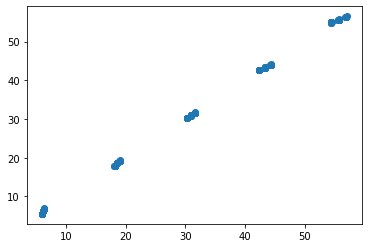

In [42]:
plt.scatter(y_pp_occ_mean, pp_lm_occ_mean.predict(X_pp_noq))

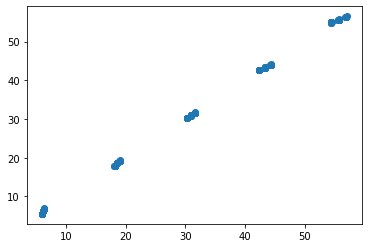

In [49]:
plt.scatter(y_pp_occ_p95, pp_lm_occ_p95.predict(X_pp_noq))

In [43]:
scores = cross_val_score(pp_lm, X_pp_noq, y_pp_occ_mean, cv=5)

In [44]:
scores

array([0.99680496, 0.99934405, 0.99998523, 0.99725337, 0.99823083])

In [48]:
y_mean_pct_blocked_by_pp
pp_lm_occ_p95 = LinearRegression()

pp_lm_occ_p95.fit(X_pp_noq, y_pp_occ_p95)

print(f"Full dataset score: {pp_lm_occ_p95.score(X_pp_noq, y_pp_occ_p95):.3f}")

Full dataset score: 1.000
